# Heading Deviation Over Time Analysis

This notebook analyzes the correlation between time and per-trial deviation of reconstructed heading from true heading.

- Creates separate figures for light and dark trials
- X-axis: Time relative to trial start
- Y-axis: Heading deviation (mvtDirError) in radians
- Y-limits: (-π, π)
- Shows 10 randomly selected trials per condition

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 10

In [2]:
# Setup paths
PROJECT_DATA_PATH = 'E:\\GitHub\\Peng_et.al_2025_noInt\\Peng'

# Sessions to use (from setup_project.py)
useAble = ['jp486-19032023-0108', 'jp486-18032023-0108',
       'jp3269-28112022-0108', 'jp486-16032023-0108',
       'jp452-25112022-0110', 'jp486-24032023-0108',
       'jp486-22032023-0108', 'jp452-24111022-0109',
       'jp486-15032023-0108', 'jp3120-25052022-0107',
       'jp3120-26052022-0107', 'jp451-28102022-0108',
       'jp486-20032023-0108', 'jp486-06032023-0108',
       'jp486-26032023-0108', 'jp486-17032023-0108',
       'jp451-29102022-0108', 'jp451-30102022-0108',
       'jp486-10032023-0108', 'jp486-05032023-0108',
       'jp3269-29112022-0108', 'mn8578-17122021-0107',
       'jp452-23112022-0108', 'jp1686-26042022-0108']

In [3]:
# Load data
print("Loading data...")
fn = os.path.join(PROJECT_DATA_PATH, "results", "reconstuctionDFAutoPI.csv")
dfAutoPI = pd.read_csv(fn)
print(f"Loaded {len(dfAutoPI)} rows")

# Filter for useable sessions
dfAutoPI = dfAutoPI[dfAutoPI.session.isin(useAble)]
print(f"After filtering for useable sessions: {len(dfAutoPI)} rows")
print(f"Sessions: {dfAutoPI.session.nunique()}")
print(f"Conditions: {dfAutoPI.condition.unique()}")

Loading data...
Loaded 6617357 rows
After filtering for useable sessions: 3034796 rows
Sessions: 23
Conditions: ['all_light' 'all_dark' 'searchToLeverPath_light' 'searchToLeverPath_dark'
 'homingFromLeavingLever_light' 'homingFromLeavingLever_dark'
 'homingFromLeavingLeverToPeriphery_light'
 'homingFromLeavingLeverToPeriphery_dark'
 'searchToLeverPathWithBridge_light' 'searchToLeverPathWithBridge_dark'
 'homingFromLeavingLeverWithBridge_light'
 'homingFromLeavingLeverWithBridge_dark' 'atLever_light' 'atLever_dark']


In [4]:
def plot_heading_deviation_by_time(df, condition_name, n_trials=10, output_path=None):
    """
    Plot heading deviation over time for multiple trials.
    
    Parameters:
    -----------
    df : DataFrame
        Filtered dataframe for specific condition
    condition_name : str
        Name of condition for title ('Light' or 'Dark')
    n_trials : int
        Number of trials to plot (default: 10)
    output_path : str
        Path to save figure (optional)
    """
    # Create unique session-trial identifier
    df['session_trial'] = df['session'] + '_T' + df['trial'].astype(str)
    unique_trials = df['session_trial'].unique()
    
    print(f"\n{condition_name} trials:")
    print(f"Total unique trials: {len(unique_trials)}")
    
    # Sample trials if more than n_trials
    if len(unique_trials) > n_trials:
        # np.random.seed(42)  # For reproducibility
        selected_trials = np.random.choice(unique_trials, n_trials, replace=False)
    else:
        selected_trials = unique_trials
        n_trials = len(unique_trials)
    
    print(f"Plotting {n_trials} trials")
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Generate colors
    colors = plt.cm.tab10(np.linspace(0, 1, n_trials))
    
    # Plot each trial
    for i, trial_id in enumerate(selected_trials):
        trial_data = df[df['session_trial'] == trial_id].copy()
        
        # Calculate time relative to trial start
        trial_data['time_rel'] = trial_data['recTime'] - trial_data['recTime'].min()
        
        # Sort by time
        trial_data = trial_data.sort_values('time_rel')
        
        # Plot
        ax.plot(trial_data['time_rel'], scipy.ndimage.gaussian_filter1d(trial_data['mvtDirError'], sigma=2), 
                color=colors[i], alpha=0.7, linewidth=1.5,
                label=trial_id)
    
    # Format plot
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.3, linewidth=1)
    ax.set_xlabel('Time from trial start (s)', fontsize=12)
    ax.set_ylabel('Heading deviation (rad)', fontsize=12)
    ax.set_ylim(-np.pi, np.pi)
    ax.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
    ax.set_yticklabels([r'-$\pi$', r'-$\pi$/2', '0', r'$\pi$/2', r'$\pi$'])
    ax.set_title(f'Heading Deviation Over Time - {condition_name} Trials', 
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, ncol=1)
    
    plt.tight_layout()
    
    # Save if path provided
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Saved figure to {output_path}")
    
    return fig, ax

## Light Trials Analysis


Processing Light Trials
Light trials: 300521 rows, 23 sessions

Light trials:
Total unique trials: 1508
Plotting 10 trials
Saved figure to E:\GitHub\Peng_et.al_2025_noInt\Peng\results\heading_deviation_light_trials.png


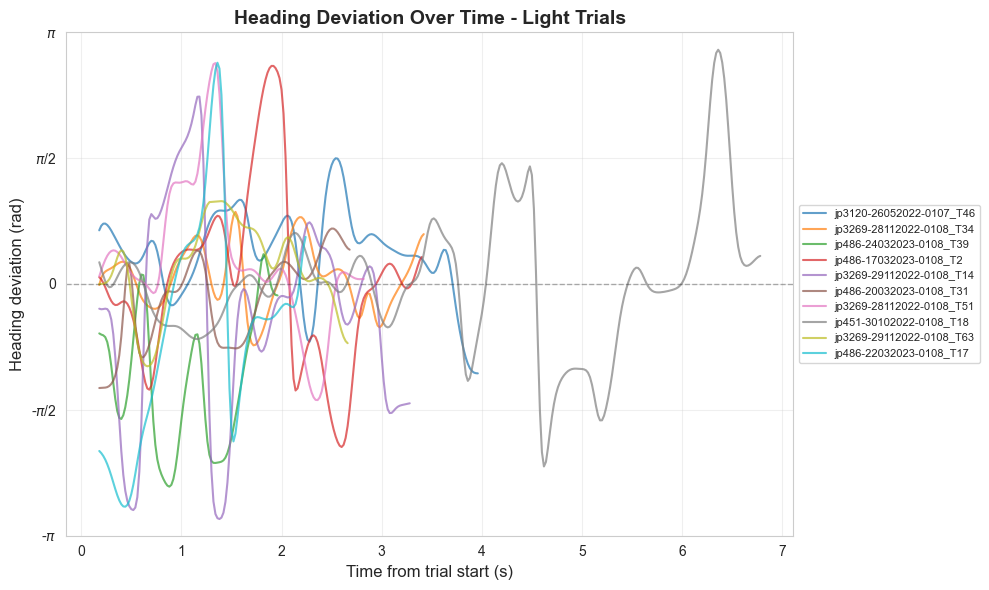

In [5]:
print("\n" + "="*60)
print("Processing Light Trials")
print("="*60)

dfLight = dfAutoPI[dfAutoPI.condition == 'all_light'].copy()
print(f"Light trials: {len(dfLight)} rows, {dfLight.session.nunique()} sessions")

fig_light, ax_light = plot_heading_deviation_by_time(
    dfLight, 
    'Light', 
    n_trials=10,
    output_path=os.path.join(PROJECT_DATA_PATH, 'results', 'heading_deviation_light_trials.png')
)

plt.show()

## Dark Trials Analysis


Processing Dark Trials
Dark trials: 694217 rows, 23 sessions

Dark trials:
Total unique trials: 1396
Plotting 1 trials
Saved figure to E:\GitHub\Peng_et.al_2025_noInt\Peng\results\heading_deviation_dark_trials.png


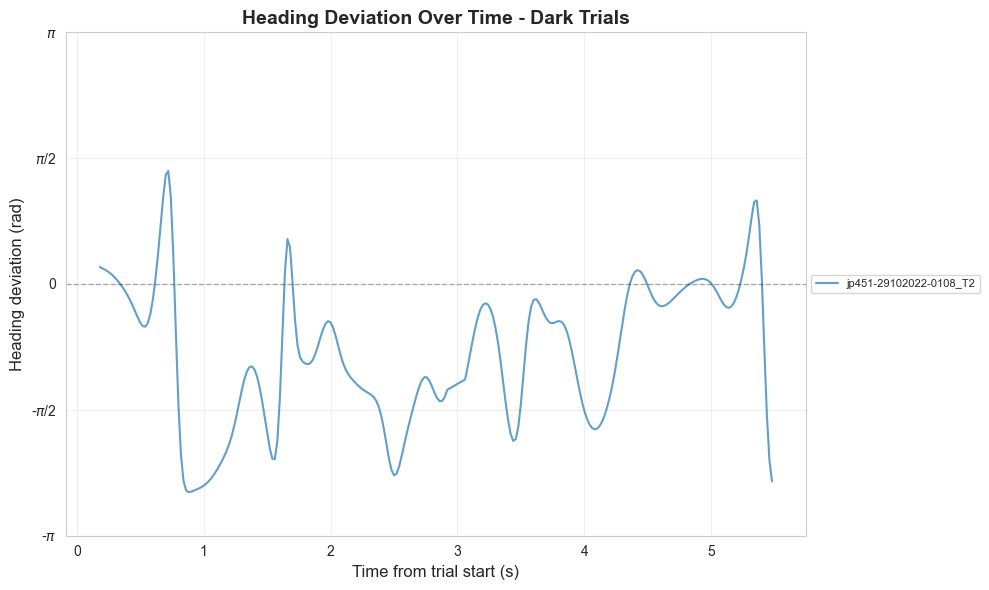

In [6]:
print("\n" + "="*60)
print("Processing Dark Trials")
print("="*60)

dfDark = dfAutoPI[dfAutoPI.condition == 'all_dark'].copy()
print(f"Dark trials: {len(dfDark)} rows, {dfDark.session.nunique()} sessions")

fig_dark, ax_dark = plot_heading_deviation_by_time(
    dfDark, 
    'Dark', 
    n_trials=1,
    output_path=os.path.join(PROJECT_DATA_PATH, 'results', 'heading_deviation_dark_trials.png')
)

plt.show()

## Summary Statistics

In [7]:
# Calculate summary statistics
print("\n" + "="*60)
print("Summary Statistics")
print("="*60)

for condition, condition_name in [('all_light', 'Light'), ('all_dark', 'Dark')]:
    df_cond = dfAutoPI[dfAutoPI.condition == condition]
    print(f"\n{condition_name} Trials:")
    print(f"  Total data points: {len(df_cond)}")
    print(f"  Unique trials: {df_cond.groupby(['session', 'trial']).ngroups}")
    print(f"  Mean heading deviation: {df_cond['mvtDirError'].mean():.4f} rad")
    print(f"  Std heading deviation: {df_cond['mvtDirError'].std():.4f} rad")
    print(f"  Median absolute deviation: {df_cond['mvtDirError'].abs().median():.4f} rad")


Summary Statistics

Light Trials:
  Total data points: 300521
  Unique trials: 1508
  Mean heading deviation: -0.0561 rad
  Std heading deviation: 1.1736 rad
  Median absolute deviation: 0.5746 rad

Dark Trials:
  Total data points: 694217
  Unique trials: 1396
  Mean heading deviation: -0.0219 rad
  Std heading deviation: 1.3884 rad
  Median absolute deviation: 0.8572 rad


## Combined Comparison Figure

Saved combined figure


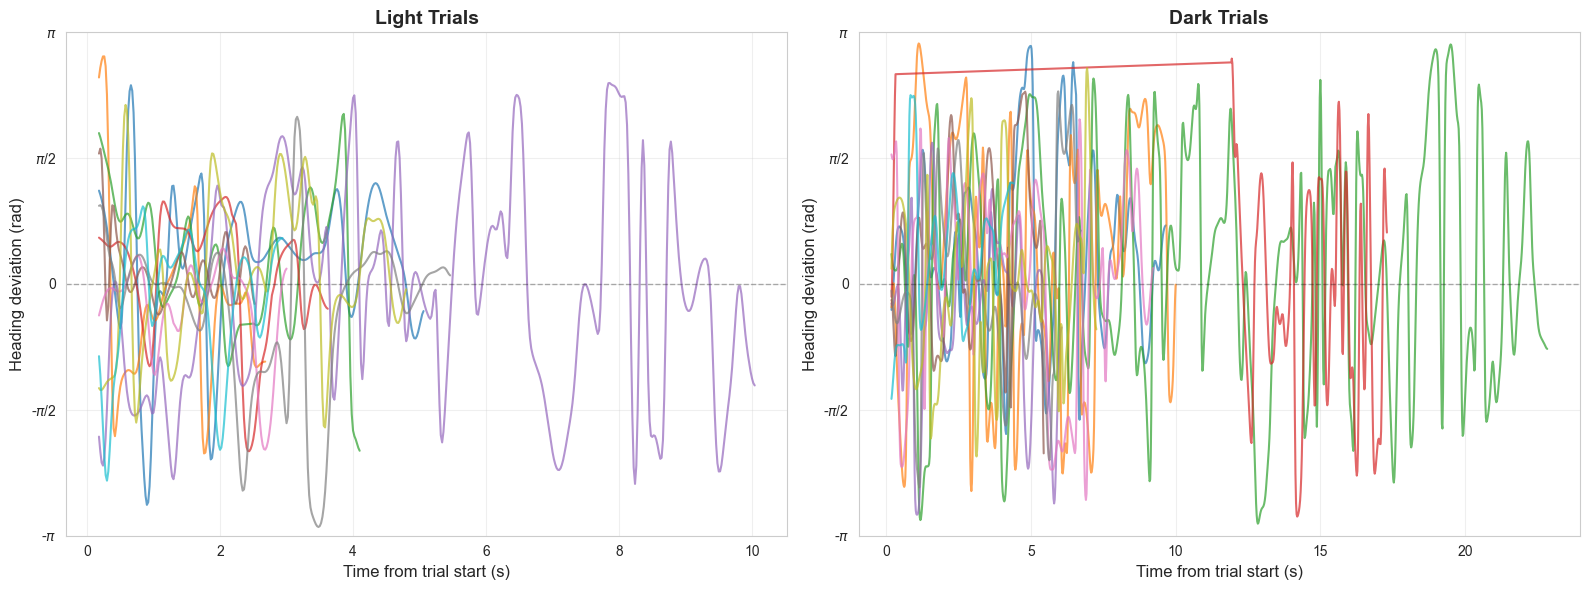

In [8]:
# Create a combined figure with both conditions side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Light trials
dfLight = dfAutoPI[dfAutoPI.condition == 'all_light'].copy()
dfLight['session_trial'] = dfLight['session'] + '_T' + dfLight['trial'].astype(str)
unique_trials_light = dfLight['session_trial'].unique()

np.random.seed(42)
selected_trials_light = np.random.choice(unique_trials_light, min(10, len(unique_trials_light)), replace=False)
colors_light = plt.cm.tab10(np.linspace(0, 1, len(selected_trials_light)))

for i, trial_id in enumerate(selected_trials_light):
    trial_data = dfLight[dfLight['session_trial'] == trial_id].copy()
    trial_data['time_rel'] = trial_data['recTime'] - trial_data['recTime'].min()
    trial_data = trial_data.sort_values('time_rel')
    axes[0].plot(trial_data['time_rel'], scipy.ndimage.gaussian_filter1d(trial_data['mvtDirError'], sigma=2), 
                 color=colors_light[i], alpha=0.7, linewidth=1.5)

axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3, linewidth=1)
axes[0].set_xlabel('Time from trial start (s)', fontsize=12)
axes[0].set_ylabel('Heading deviation (rad)', fontsize=12)
axes[0].set_ylim(-np.pi, np.pi)
axes[0].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axes[0].set_yticklabels([r'-$\pi$', r'-$\pi$/2', '0', r'$\pi$/2', r'$\pi$'])
axes[0].set_title('Light Trials', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Dark trials
dfDark = dfAutoPI[dfAutoPI.condition == 'all_dark'].copy()
dfDark['session_trial'] = dfDark['session'] + '_T' + dfDark['trial'].astype(str)
unique_trials_dark = dfDark['session_trial'].unique()

np.random.seed(42)
selected_trials_dark = np.random.choice(unique_trials_dark, min(10, len(unique_trials_dark)), replace=False)
colors_dark = plt.cm.tab10(np.linspace(0, 1, len(selected_trials_dark)))

for i, trial_id in enumerate(selected_trials_dark):
    trial_data = dfDark[dfDark['session_trial'] == trial_id].copy()
    trial_data['time_rel'] = trial_data['recTime'] - trial_data['recTime'].min()
    trial_data = trial_data.sort_values('time_rel')
    axes[1].plot(trial_data['time_rel'], scipy.ndimage.gaussian_filter1d(trial_data['mvtDirError'], sigma=2), 
                 color=colors_dark[i], alpha=0.7, linewidth=1.5)

axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3, linewidth=1)
axes[1].set_xlabel('Time from trial start (s)', fontsize=12)
axes[1].set_ylabel('Heading deviation (rad)', fontsize=12)
axes[1].set_ylim(-np.pi, np.pi)
axes[1].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axes[1].set_yticklabels([r'-$\pi$', r'-$\pi$/2', '0', r'$\pi$/2', r'$\pi$'])
axes[1].set_title('Dark Trials', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(PROJECT_DATA_PATH, 'results', 'heading_deviation_combined.png'), 
            dpi=300, bbox_inches='tight')
print(f"Saved combined figure")
plt.show()

## Analysis Complete

The notebook has generated:
1. Individual figure for light trials
2. Individual figure for dark trials
3. Combined comparison figure
4. Summary statistics for both conditions

All figures show heading deviation (mvtDirError) over time relative to trial start, with y-axis limits of (-π, π).